In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import numpy as np

In [18]:
file = '/lustre/storeB/project/fou/hi/foccus/datasets/symlinks/norkystv3-hindcast/2024/norkyst800-20240101.nc'
ds = xr.open_dataset(file).isel(s_rho=0, s_w=0)
print(ds)

<xarray.Dataset> Size: 3GB
Dimensions:           (time: 24, Y: 1148, X: 2747)
Coordinates:
  * time              (time) datetime64[ns] 192B 2024-01-01 ... 2024-01-01T23...
    s_rho             float64 8B -0.9799
  * X                 (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
  * Y                 (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.168e+05 9.176e+05
    s_w               float64 8B -1.0
    lon               (Y, X) float64 25MB ...
    lat               (Y, X) float64 25MB ...
Data variables: (12/18)
    Uwind_eastward    (time, Y, X) float32 303MB ...
    Vwind_northward   (time, Y, X) float32 303MB ...
    zeta              (time, Y, X) float32 303MB ...
    ubar_eastward     (time, Y, X) float32 303MB ...
    vbar_northward    (time, Y, X) float32 303MB ...
    u_eastward        (time, Y, X) float32 303MB ...
    ...                ...
    hc                float64 8B ...
    Cs_r              float64 8B ...
    Cs_w              float64 8B ...
    h           

# Violin plot

In [16]:
#Much faster to plot if I flatten it first
temp = np.array(ds.temperature).flatten()
sal = np.array(ds.salinity).flatten()
u = np.array(ds.u_eastward).flatten()
v = np.array(ds.v_northward).flatten()

/tmp/ipykernel_1429277/3087974406.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(['Salinity'])
/tmp/ipykernel_1429277/3087974406.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(['Salinity 33 cutoff'])
/tmp/ipykernel_1429277/3087974406.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(['Temperature'])


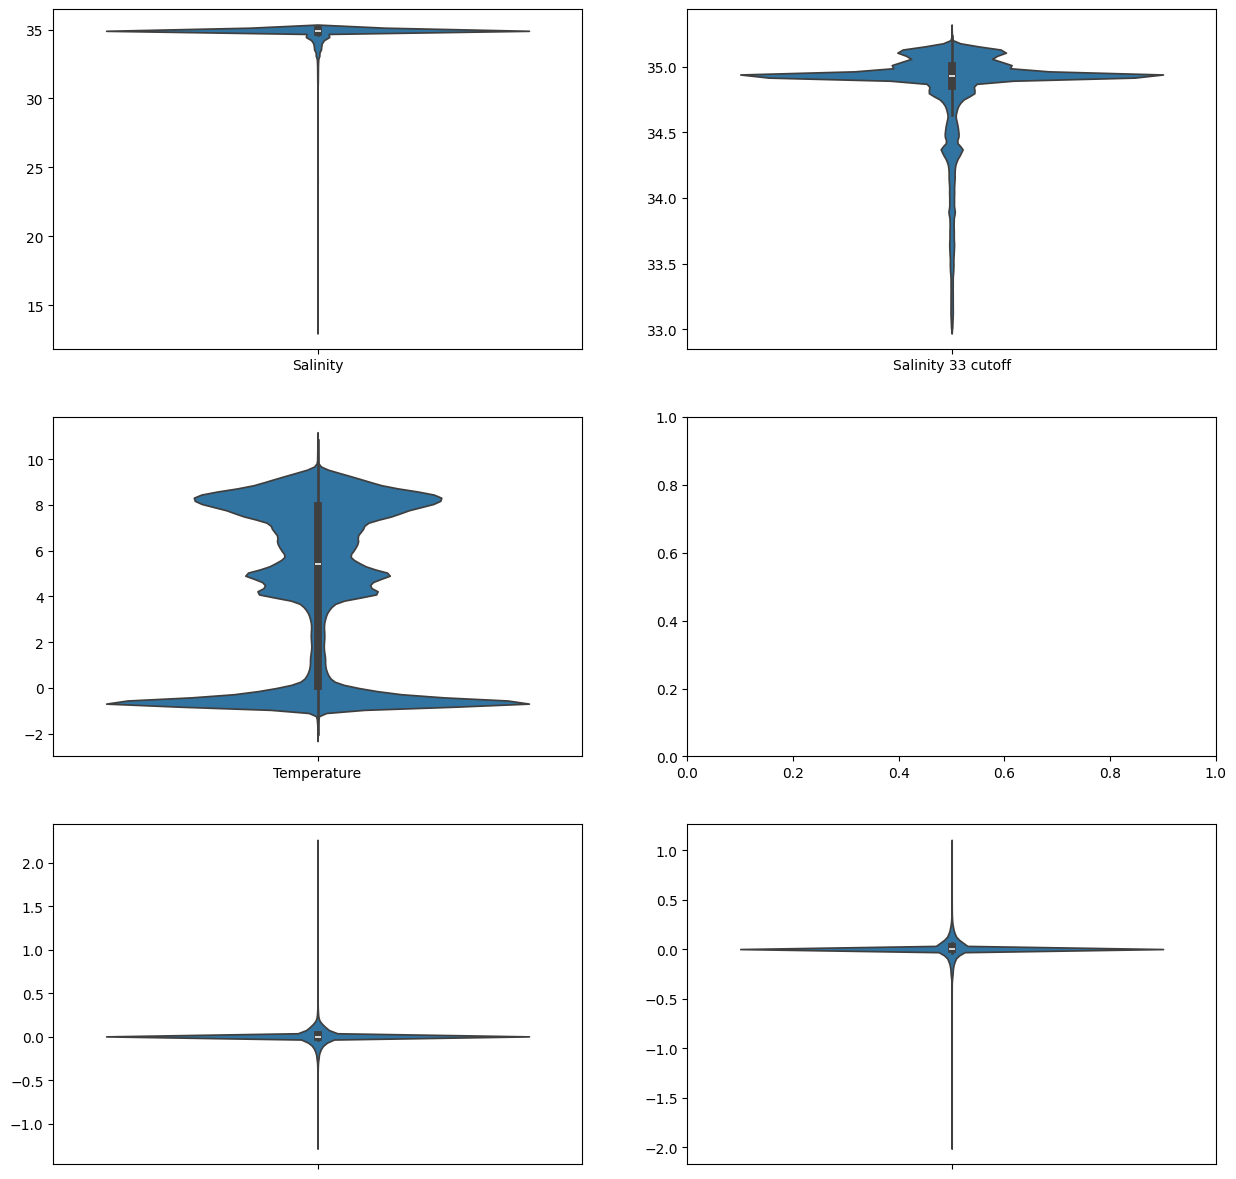

In [28]:
fig, ax = plt.subplots(3,2, figsize=(15,15))


a = sns.violinplot(data=sal, inner='box', ax=ax[0,0])
a.set_xticklabels(['Salinity'])
a = sns.violinplot(data=sal[np.where(sal > 33)], ax=ax[0,1])
a.set_xticklabels(['Salinity 33 cutoff'])
a = sns.violinplot(data=temp, inner='box', ax=ax[1,0])
a.set_xticklabels(['Temperature'])
a = sns.violinplot(data=u, inner='box', ax=ax[2,0])

a = sns.violinplot(data=v, inner='box', ax=ax[2,1])